
# Classification

In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',as_frame=False)

In [2]:

X,y=mnist['data'], mnist['target']
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [3]:
X.shape,y.shape

((70000, 784), (70000,))

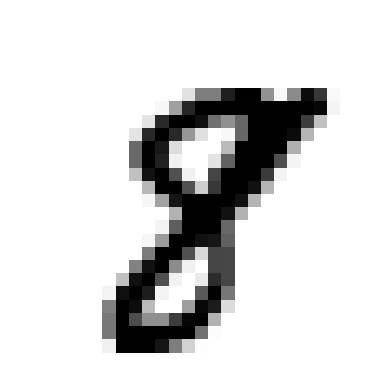

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X[55].reshape(28,28),cmap='binary')
plt.axis('off');

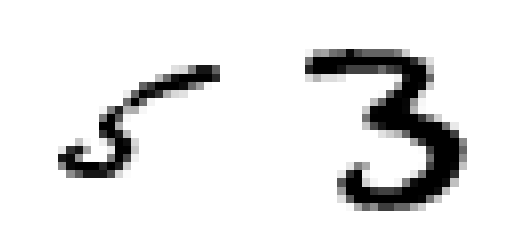

In [5]:
import matplotlib.pyplot as plt
def digit_image(digit):
 plt.imshow(digit.reshape(28,28),cmap='binary')
 plt.axis('off')
plt.subplot(1,2,1)
digit_image(X[11])
plt.subplot(1,2,2)
digit_image(X[12])

In [6]:
a=['A','B','C']
for idx,item in enumerate(a):
  print(idx,item)

0 A
1 B
2 C


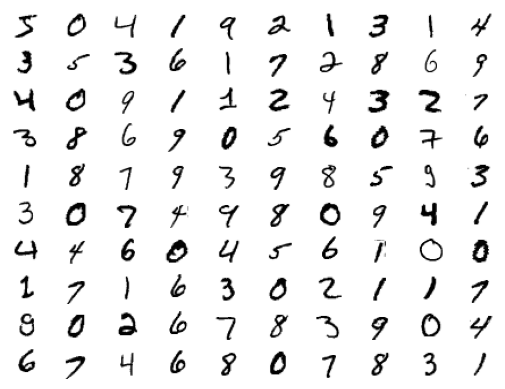

In [7]:
for idx, image in enumerate (X[:100]):
  plt.subplot(10,10,idx+1)
  digit_image(X[idx])

In [8]:
X_train=X[:60000]
X_test=X[60000:]
y_train=y[:60000]
y_test=y[60000:]

In [9]:
y_train[:10]=='5'

array([ True, False, False, False, False, False, False, False, False,
       False])

In [10]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier (random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.score(X_test,y_test_5)

0.9492

In [13]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [14]:
dummy_clf.score(X_test,y_test_5)

0.9108

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [16]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [17]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [18]:
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [19]:
some_digit=X[0]
y_score=sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [20]:
threshold=0
y_somedigit_pred=(y_score>threshold)
y_somedigit_pred

array([ True])

In [21]:
threshold=3000
y_somedigit_pred=(y_score>threshold)
y_somedigit_pred

array([False])

In [22]:
y_scores= cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [23]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [24]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,tresholds=precision_recall_curve(y_train_5,y_scores)

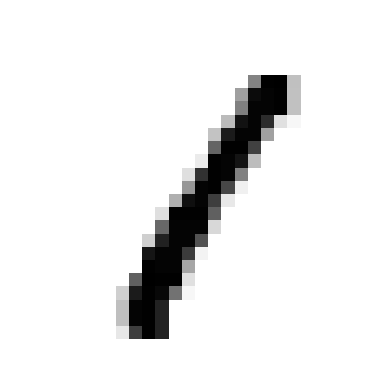

In [25]:
digit_image(X[3])

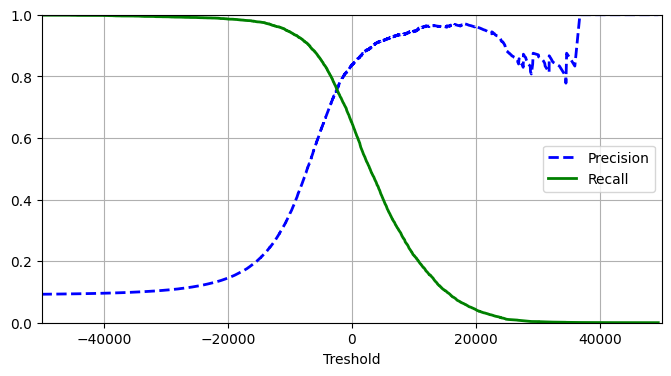

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(tresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(tresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Treshold')
plt.legend(loc='center right')

plt.show()

In [27]:
import numpy as np
np.array([1,2,3,4,4,4]).argmax()

np.int64(3)

In [28]:
idx_for_90_precision=(precisions>=0.9).argmax()
idx_for_90_precision

np.int64(57109)

In [29]:
recalls[idx_for_90_precision]

np.float64(0.4799852425751706)

In [30]:
tresholds_for_90_precision=tresholds[idx_for_90_precision]
tresholds_for_90_precision

np.float64(3370.0194991439557)

In [31]:
y_train_pred_90=(y_scores>=tresholds_for_90_precision)
y_train_pred_90


array([False, False, False, ...,  True, False, False])

In [32]:

precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [33]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

In [35]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=2,
                                  method='predict_proba')

In [36]:
y_probas_forest[:2]

array([[0.2, 0.8],
       [1. , 0. ]])

In [37]:
y_scores_forest=y_probas_forest[:,1]
precisions_forest,recalls_forest,tresholds_forest=precision_recall_curve(y_train_5,y_scores_forest)

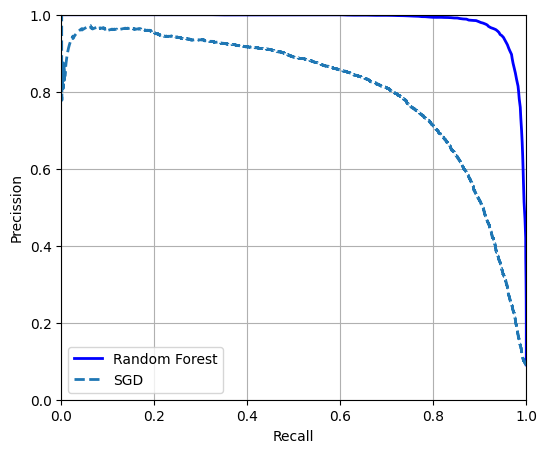

In [38]:
plt.figure(figsize=(6,5))
plt.plot(recalls_forest,precisions_forest,'b-',linewidth=2,label='Random Forest')

plt.plot(recalls,precisions,'--',linewidth=2,label='SGD')
plt.xlabel("Recall")
plt.ylabel('Precission')
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc='lower left')
plt.show()

In [39]:
idx=(precisions_forest>=0.9).argmax()
precisions_forest[idx],recalls_forest

(np.float64(0.906396255850234),
 array([1.        , 1.        , 1.        , 0.99981553, 0.9994466 ,
        0.99889319, 0.99870873, 0.99723298, 0.99520384, 0.99409703,
        0.99317469, 0.99225235, 0.99114555, 0.98985427, 0.98819406,
        0.98708725, 0.98487364, 0.98358236, 0.98229109, 0.97915514,
        0.97657259, 0.97399004, 0.97159196, 0.96974728, 0.96827154,
        0.96458218, 0.96236857, 0.95941708, 0.957019  , 0.95314518,
        0.95093156, 0.94724221, 0.94373732, 0.94133924, 0.93820328,
        0.9346984 , 0.93027117, 0.92363033, 0.91846523, 0.91625161,
        0.91293119, 0.90684376, 0.90223206, 0.8974359 , 0.89208633,
        0.8871057 , 0.88157167, 0.87640657, 0.87142594, 0.86423169,
        0.85666851, 0.85187235, 0.84486257, 0.83803726, 0.83139642,
        0.82401771, 0.816639  , 0.80704667, 0.79911455, 0.79173584,
        0.78288139, 0.77550267, 0.76812396, 0.75797823, 0.74598783,
        0.73565763, 0.72458956, 0.71241468, 0.699133  , 0.68990961,
        0.677550

In [40]:
y_train_pred_forest=y_probas_forest[:,1]>=0.3
f1_score(y_train_5,y_train_pred_forest)

0.9459583448022755

In [41]:
precision_score(y_train_5,y_train_pred_forest)

0.9410368747718145

In [42]:
recall_score(y_train_5,y_train_pred_forest)

0.9509315624423538

# Multiclass Classification


In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)
forest_clf.score(X_test,y_test)

0.9705

In [44]:
from sklearn.svm import SVC

svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [45]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [46]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [47]:
class_id=some_digit_scores.argmax()
class_id


np.int64(5)

In [48]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [49]:
svm_clf.decision_function_shape='ovo'
some_digit_scores_ovo=svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [50]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [51]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [52]:
len(ovr_clf.estimators_)

10

In [53]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.score(X_test,y_test)



0.874

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [56]:
X_test_scaled=scaler.transform(X_test.astype("float64"))
sgd_clf.fit(X_test_scaled,y_test)

SGDClassifier(random_state=42)

# Error Analysis


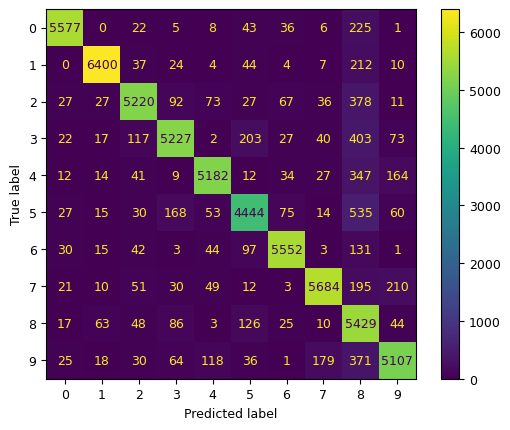

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

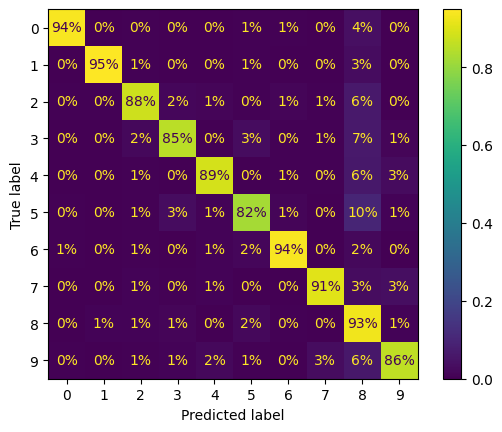

In [58]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

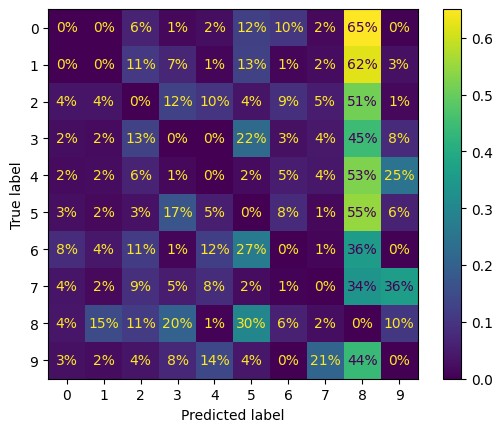

In [59]:
sample_weight=(y_train_pred != y_train)
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true",values_format=".0%")
plt.show()

In [60]:
cl_a,cl_b='3','5'
X_aa=X_train[(y_train ==cl_a) & (y_train_pred==cl_a)]
X_ab=X_train[(y_train ==cl_a) & (y_train_pred==cl_b)]
X_ba=X_train[(y_train ==cl_b) & (y_train_pred==cl_a)]
X_bb=X_train[(y_train ==cl_b) & (y_train_pred==cl_b)]

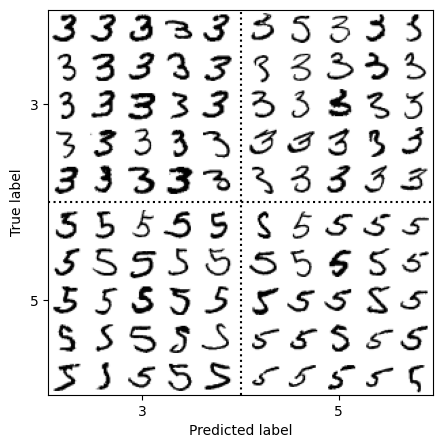

In [61]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Multilabel Classification

In [62]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [63]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [64]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.9764102655606048

# Multioutput Classification


In [65]:
np.random.seed(42)
noise= np.random.randint (0,100,(len(X_train),784))
X_train_mod=X_train + noise
noise= np.random.randint (0,100,(len(X_test),784))
X_test_mod=X_test + noise
y_train_mod=X_train
y_test_mod=X_test


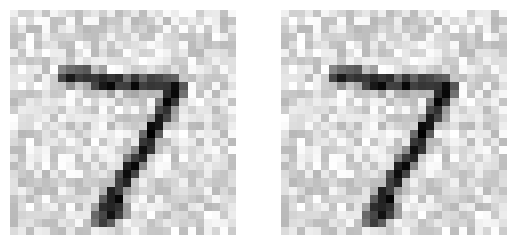

In [66]:
plt.subplot(121);digit_image(X_test_mod[0])
plt.subplot(122);digit_image(X_test_mod[0])
plt.show()

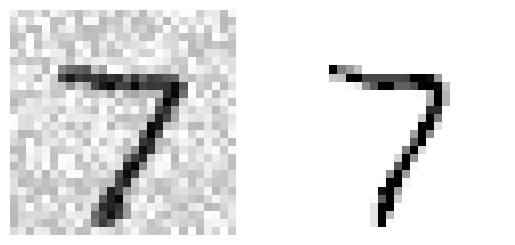

In [67]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[0]])
plt.subplot(121);digit_image(X_test_mod[0])
plt.subplot(122);digit_image(clean_digit)
plt.show()